Train on 10000 samples, validate on 10000 samples
Epoch 1/100
10000/10000 [==============================] - 1s 72us/sample - loss: 0.9048 - acc: 0.7621 - val_loss: 0.4837 - val_acc: 0.8776
Epoch 2/100
10000/10000 [==============================] - 0s 31us/sample - loss: 0.3867 - acc: 0.8979 - val_loss: 0.3725 - val_acc: 0.8942
Epoch 3/100
10000/10000 [==============================] - 0s 30us/sample - loss: 0.3114 - acc: 0.9159 - val_loss: 0.3316 - val_acc: 0.9065
Epoch 4/100
10000/10000 [==============================] - 0s 44us/sample - loss: 0.2717 - acc: 0.9252 - val_loss: 0.2944 - val_acc: 0.9164
Epoch 5/100
10000/10000 [==============================] - 0s 44us/sample - loss: 0.2439 - acc: 0.9325 - val_loss: 0.2906 - val_acc: 0.9141
Epoch 6/100
10000/10000 [==============================] - 0s 34us/sample - loss: 0.2238 - acc: 0.9380 - val_loss: 0.2757 - val_acc: 0.9184
Epoch 7/100
10000/10000 [==============================] - 0s 31us/sample - loss: 0.2053 - acc: 0.9430 - val_l

Epoch 59/100
10000/10000 [==============================] - 0s 31us/sample - loss: 0.0221 - acc: 0.9985 - val_loss: 0.2130 - val_acc: 0.9394
Epoch 60/100
10000/10000 [==============================] - 0s 30us/sample - loss: 0.0214 - acc: 0.9985 - val_loss: 0.2167 - val_acc: 0.9388
Epoch 61/100
10000/10000 [==============================] - 0s 30us/sample - loss: 0.0206 - acc: 0.9985 - val_loss: 0.2182 - val_acc: 0.9381
Epoch 62/100
10000/10000 [==============================] - 0s 32us/sample - loss: 0.0201 - acc: 0.9991 - val_loss: 0.2170 - val_acc: 0.9389
Epoch 63/100
10000/10000 [==============================] - 0s 32us/sample - loss: 0.0195 - acc: 0.9987 - val_loss: 0.2173 - val_acc: 0.9387
Epoch 64/100
10000/10000 [==============================] - 0s 31us/sample - loss: 0.0189 - acc: 0.9989 - val_loss: 0.2171 - val_acc: 0.9381
Epoch 65/100
10000/10000 [==============================] - 0s 33us/sample - loss: 0.0186 - acc: 0.9988 - val_loss: 0.2181 - val_acc: 0.9383
Epoch 66/100


KeyError: 'accuracy'

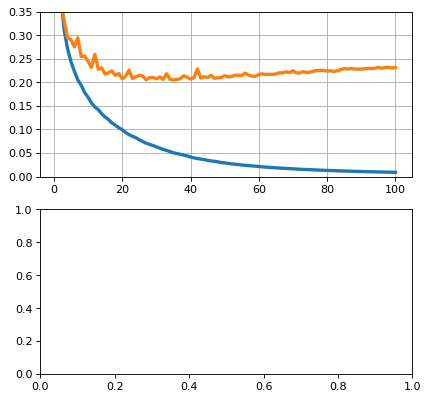

In [17]:
import numpy as np
import matplotlib.pyplot as plt

mnist = np.load('mnist.npz')
x_train = mnist['x_train'][:10000]/255.
y_train = np.array([np.eye(10)[n] for n in mnist['y_train'][:10000]])
x_test = mnist['x_test']/255.
y_test = np.array([np.eye(10)[n] for n in mnist['y_test']])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2 


model = Sequential()
model.add(Reshape((784,), input_shape=(28,28)))
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=1.0),
              metrics=['accuracy'])

rec = model.fit(x_train, y_train, epochs=100, batch_size=120,
                validation_data=(x_test, y_test))

vep = np.linspace(1.,100.,100)
fig = plt.figure(figsize=(6,6), dpi=80)
plt.subplot(2,1,1)
plt.plot(vep,rec.history['loss'], lw=3)
plt.plot(vep,rec.history['val_loss'], lw=3)
plt.ylim(0.,0.35)
plt.grid()
plt.subplot(2,1,2)
plt.plot(vep,rec.history['accuracy'], lw=3)
plt.plot(vep,rec.history['val_accuracy'], lw=3)
plt.ylim(0.85,1.01)
plt.grid()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mnist = np.load('mnist.npz')
x_train = mnist['x_train'][:10000]/255.
y_train = np.array([np.eye(10)[n] for n in mnist['y_train'][:10000]])
x_test = mnist['x_test']/255.
y_test = np.array([np.eye(10)[n] for n in mnist['y_test']])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2

m1 = Sequential()
m1.add(Reshape((784,), input_shape=(28,28)))
m1.add(Dense(30, activation='sigmoid'))
m1.add(Dense(10, activation='softmax'))
m1.compile(loss='categorical_crossentropy',
           optimizer=SGD(lr=1.0), metrics=['accuracy'])

m2 = Sequential()
m2.add(Reshape((784,), input_shape=(28,28)))
m2.add(Dense(30, activation='sigmoid'))
m2.add(Dense(10, activation='softmax', kernel_regularizer=l2(0.01)))
m2.compile(loss='categorical_crossentropy',
           optimizer=SGD(lr=1.0), metrics=['accuracy'])

rec1 = m1.fit(x_train, y_train, epochs=100, batch_size=120,
              validation_data=(x_test, y_test))
rec2 = m2.fit(x_train, y_train, epochs=100, batch_size=120,
              validation_data=(x_test, y_test))

vep = np.linspace(1.,100.,100)
fig = plt.figure(figsize=(6,6), dpi=80)
plt.subplot(2,1,1)
plt.plot(vep,rec1.history['accuracy'], lw=3)
plt.plot(vep,rec1.history['val_accuracy'], lw=3)
plt.ylim(0.85,1.01)
plt.grid()
plt.subplot(2,1,2)
plt.plot(vep,rec2.history['accuracy'], lw=3)
plt.plot(vep,rec2.history['val_accuracy'], lw=3)
plt.ylim(0.85,1.01)
plt.grid()
plt.show()


Train on 10000 samples, validate on 10000 samples
Epoch 1/100
10000/10000 [==============================] - 1s 91us/sample - loss: 0.9251 - acc: 0.7575 - val_loss: 0.5042 - val_acc: 0.8680
Epoch 2/100
10000/10000 [==============================] - 0s 42us/sample - loss: 0.3958 - acc: 0.8954 - val_loss: 0.3851 - val_acc: 0.8884
Epoch 3/100
10000/10000 [==============================] - 1s 56us/sample - loss: 0.3190 - acc: 0.9108 - val_loss: 0.3398 - val_acc: 0.9015
Epoch 4/100
10000/10000 [==============================] - 0s 43us/sample - loss: 0.2766 - acc: 0.9225 - val_loss: 0.3154 - val_acc: 0.9096
Epoch 5/100
10000/10000 [==============================] - 0s 41us/sample - loss: 0.2488 - acc: 0.9309 - val_loss: 0.2881 - val_acc: 0.9177
Epoch 6/100
10000/10000 [==============================] - 0s 45us/sample - loss: 0.2260 - acc: 0.9367 - val_loss: 0.3070 - val_acc: 0.9062
Epoch 7/100
10000/10000 [==============================] - 0s 34us/sample - loss: 0.2082 - acc: 0.9410 - val_l

Epoch 59/100
10000/10000 [==============================] - 0s 41us/sample - loss: 0.0228 - acc: 0.9983 - val_loss: 0.2311 - val_acc: 0.9350
Epoch 60/100
10000/10000 [==============================] - 1s 54us/sample - loss: 0.0223 - acc: 0.9984 - val_loss: 0.2337 - val_acc: 0.9347
Epoch 61/100
10000/10000 [==============================] - 0s 44us/sample - loss: 0.0217 - acc: 0.9983 - val_loss: 0.2339 - val_acc: 0.9350
Epoch 62/100
10000/10000 [==============================] - 0s 33us/sample - loss: 0.0211 - acc: 0.9981 - val_loss: 0.2336 - val_acc: 0.9351
Epoch 63/100
10000/10000 [==============================] - 0s 34us/sample - loss: 0.0205 - acc: 0.9985 - val_loss: 0.2343 - val_acc: 0.9332
Epoch 64/100
10000/10000 [==============================] - 0s 34us/sample - loss: 0.0200 - acc: 0.9985 - val_loss: 0.2355 - val_acc: 0.9346
Epoch 65/100
10000/10000 [==============================] - 0s 33us/sample - loss: 0.0192 - acc: 0.9987 - val_loss: 0.2359 - val_acc: 0.9355
Epoch 66/100


10000/10000 [==============================] - 0s 46us/sample - loss: 0.2755 - acc: 0.9166 - val_loss: 0.2205 - val_acc: 0.9343
Epoch 17/100
10000/10000 [==============================] - 0s 42us/sample - loss: 0.2693 - acc: 0.9185 - val_loss: 0.2164 - val_acc: 0.9357
Epoch 18/100
10000/10000 [==============================] - 0s 45us/sample - loss: 0.2666 - acc: 0.9170 - val_loss: 0.2143 - val_acc: 0.9363
Epoch 19/100
10000/10000 [==============================] - 0s 42us/sample - loss: 0.2614 - acc: 0.9184 - val_loss: 0.2258 - val_acc: 0.9343
Epoch 20/100
10000/10000 [==============================] - 0s 42us/sample - loss: 0.2555 - acc: 0.9230 - val_loss: 0.2128 - val_acc: 0.9376
Epoch 21/100
10000/10000 [==============================] - 0s 49us/sample - loss: 0.2496 - acc: 0.9203 - val_loss: 0.2066 - val_acc: 0.9393
Epoch 22/100
10000/10000 [==============================] - 0s 48us/sample - loss: 0.2530 - acc: 0.9248 - val_loss: 0.2038 - val_acc: 0.9394
Epoch 23/100
10000/10000 [

10000/10000 [==============================] - 1s 54us/sample - loss: 0.1884 - acc: 0.9407 - val_loss: 0.1843 - val_acc: 0.9463
Epoch 75/100
10000/10000 [==============================] - 1s 50us/sample - loss: 0.1883 - acc: 0.9389 - val_loss: 0.1855 - val_acc: 0.9456
Epoch 76/100
10000/10000 [==============================] - 0s 44us/sample - loss: 0.1834 - acc: 0.9433 - val_loss: 0.1939 - val_acc: 0.9449
Epoch 77/100
10000/10000 [==============================] - 0s 43us/sample - loss: 0.1903 - acc: 0.9384 - val_loss: 0.1850 - val_acc: 0.9463
Epoch 78/100
10000/10000 [==============================] - 0s 47us/sample - loss: 0.1805 - acc: 0.9412 - val_loss: 0.1933 - val_acc: 0.9424
Epoch 79/100
10000/10000 [==============================] - 0s 47us/sample - loss: 0.1919 - acc: 0.9388 - val_loss: 0.1891 - val_acc: 0.9456
Epoch 80/100
10000/10000 [==============================] - 1s 51us/sample - loss: 0.1846 - acc: 0.9399 - val_loss: 0.1869 - val_acc: 0.9469
Epoch 81/100
10000/10000 [

KeyError: 'accuracy'

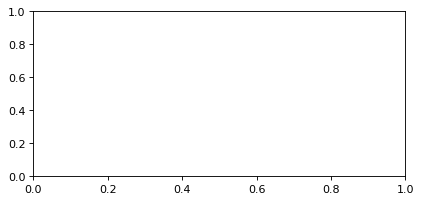

In [16]:
import numpy as np
import matplotlib.pyplot as plt

mnist = np.load('mnist.npz')
x_train = mnist['x_train'][:10000]/255.
y_train = np.array([np.eye(10)[n] for n in mnist['y_train'][:10000]])
x_test = mnist['x_test']/255.
y_test = np.array([np.eye(10)[n] for n in mnist['y_test']])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Dropout
from tensorflow.keras.optimizers import SGD

m1 = Sequential()
m1.add(Reshape((784,), input_shape=(28,28)))
m1.add(Dense(30, activation='sigmoid'))
m1.add(Dense(10, activation='softmax'))
m1.compile(loss='categorical_crossentropy',
           optimizer=SGD(lr=1.0), metrics=['accuracy'])

m2 = Sequential()
m2.add(Reshape((784,), input_shape=(28,28)))
m2.add(Dropout(0.2))
m2.add(Dense(30, activation='sigmoid'))
m2.add(Dropout(0.2))
m2.add(Dense(10, activation='softmax'))
m2.compile(loss='categorical_crossentropy',
           optimizer=SGD(lr=1.0), metrics=['accuracy'])

rec1 = m1.fit(x_train, y_train, epochs=100, batch_size=120,
              validation_data=(x_test, y_test))
rec2 = m2.fit(x_train, y_train, epochs=100, batch_size=120,
              validation_data=(x_test, y_test))

vep = np.linspace(1.,100.,100)
fig = plt.figure(figsize=(6,6), dpi=80)
plt.subplot(2,1,1)
plt.plot(vep,rec1.history['accuracy'], lw=3)
plt.plot(vep,rec1.history['val_accuracy'], lw=3)
plt.ylim(0.85,1.01)
plt.grid()
plt.subplot(2,1,2)
plt.plot(vep,rec2.history['accuracy'], lw=3)
plt.plot(vep,rec2.history['val_accuracy'], lw=3)
plt.ylim(0.85,1.01)
plt.grid()
plt.show()


In [18]:
import numpy as np
import matplotlib.pyplot as plt

mnist = np.load('mnist.npz')
x_train = mnist['x_train'][:10000]/255.
y_train = np.array([np.eye(10)[n] for n in mnist['y_train'][:10000]])
x_valid = mnist['x_train'][50000:]/255.
y_valid = np.array([np.eye(10)[n] for n in mnist['y_train'][50000:]])
x_test = mnist['x_test']/255.
y_test = np.array([np.eye(10)[n] for n in mnist['y_test']])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Reshape((784,), input_shape=(28,28)))
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=1.0), metrics=['accuracy'])

rec = model.fit(x_train, y_train, epochs=100, batch_size=120,
                validation_data=(x_valid, y_valid),
                callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

print('Performance (training)')
print('Loss: %.5f, Acc: %.5f' % tuple(model.evaluate(x_train, y_train)))
print('Performance (validation)')
print('Loss: %.5f, Acc: %.5f' % tuple(model.evaluate(x_valid, y_valid)))
print('Performance (testing)')
print('Loss: %.5f, Acc: %.5f' % tuple(model.evaluate(x_test, y_test)))


Train on 10000 samples, validate on 10000 samples
Epoch 1/100
10000/10000 [==============================] - 1s 63us/sample - loss: 0.9117 - acc: 0.7670 - val_loss: 0.4651 - val_acc: 0.8758
Epoch 2/100
10000/10000 [==============================] - 0s 33us/sample - loss: 0.3855 - acc: 0.8976 - val_loss: 0.3357 - val_acc: 0.9087
Epoch 3/100
10000/10000 [==============================] - 0s 31us/sample - loss: 0.3078 - acc: 0.9142 - val_loss: 0.3008 - val_acc: 0.9136
Epoch 4/100
10000/10000 [==============================] - 0s 39us/sample - loss: 0.2682 - acc: 0.9261 - val_loss: 0.2932 - val_acc: 0.9098
Epoch 5/100
10000/10000 [==============================] - 0s 44us/sample - loss: 0.2406 - acc: 0.9317 - val_loss: 0.2705 - val_acc: 0.9192
Epoch 6/100
10000/10000 [==============================] - 0s 34us/sample - loss: 0.2195 - acc: 0.9393 - val_loss: 0.2607 - val_acc: 0.9234
Epoch 7/100
10000/10000 [==============================] - 0s 38us/sample - loss: 0.2043 - acc: 0.9423 - val_l

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 10000 samples, validate on 10000 samples
Epoch 1/100
10000/10000 [==============================] - 1s 74us/sample - loss: 0.9426 - acc: 0.7537 - val_loss: 0.4878 - val_acc: 0.8772
Epoch 2/100
10000/10000 [==============================] - 0s 34us/sample - loss: 0.3884 - acc: 0.8978 - val_loss: 0.3830 - val_acc: 0.8872
Epoch 3/100
10000/10000 [==============================] - 0s 37us/sample - loss: 0.3110 - acc: 0.9159 - val_loss: 0.3287 - val_acc: 0.9047
Epoch 4/100
10000/10000 [==============================] - 0s 34us/sample - loss: 0.2711 - acc: 0.9243 - val_loss: 0.3679 - val_acc: 0.8908
Epoch 5/100
10000/10000 [==============================] - 0s 32us/sample - loss: 0.2431 - acc: 0.9297 - val_loss: 0.3010 - val_acc: 0.9116
Epoch 6/100
10

Epoch 54/100
10000/10000 [==============================] - 0s 44us/sample - loss: 0.0247 - acc: 0.9980 - val_loss: 0.2134 - val_acc: 0.9408
Epoch 55/100
10000/10000 [==============================] - 0s 42us/sample - loss: 0.0239 - acc: 0.9982 - val_loss: 0.2118 - val_acc: 0.9395
Epoch 56/100
10000/10000 [==============================] - 0s 46us/sample - loss: 0.0233 - acc: 0.9985 - val_loss: 0.2114 - val_acc: 0.9394
Epoch 57/100
10000/10000 [==============================] - 0s 41us/sample - loss: 0.0227 - acc: 0.9982 - val_loss: 0.2120 - val_acc: 0.9395
Epoch 58/100
10000/10000 [==============================] - 0s 46us/sample - loss: 0.0220 - acc: 0.9988 - val_loss: 0.2203 - val_acc: 0.9384
Epoch 59/100
10000/10000 [==============================] - 0s 32us/sample - loss: 0.0217 - acc: 0.9987 - val_loss: 0.2131 - val_acc: 0.9393
Epoch 60/100
10000/10000 [==============================] - 0s 44us/sample - loss: 0.0209 - acc: 0.9989 - val_loss: 0.2153 - val_acc: 0.9377
Epoch 61/100


Epoch 12/100
30000/30000 [==============================] - 1s 21us/sample - loss: 0.1548 - acc: 0.9549 - val_loss: 0.1732 - val_acc: 0.9472
Epoch 13/100
30000/30000 [==============================] - 1s 20us/sample - loss: 0.1479 - acc: 0.9574 - val_loss: 0.1785 - val_acc: 0.9454
Epoch 14/100
30000/30000 [==============================] - 1s 20us/sample - loss: 0.1410 - acc: 0.9592 - val_loss: 0.1773 - val_acc: 0.9449
Epoch 15/100
30000/30000 [==============================] - 1s 25us/sample - loss: 0.1361 - acc: 0.9604 - val_loss: 0.1686 - val_acc: 0.9474
Epoch 16/100
30000/30000 [==============================] - 1s 21us/sample - loss: 0.1303 - acc: 0.9629 - val_loss: 0.1726 - val_acc: 0.9446
Epoch 17/100
30000/30000 [==============================] - 1s 21us/sample - loss: 0.1248 - acc: 0.9643 - val_loss: 0.1680 - val_acc: 0.9460
Epoch 18/100
30000/30000 [==============================] - 1s 20us/sample - loss: 0.1206 - acc: 0.9648 - val_loss: 0.1681 - val_acc: 0.9464
Epoch 19/100


30000/30000 [==============================] - 1s 36us/sample - loss: 0.0339 - acc: 0.9932 - val_loss: 0.2087 - val_acc: 0.9428
Epoch 71/100
30000/30000 [==============================] - 1s 23us/sample - loss: 0.0339 - acc: 0.9935 - val_loss: 0.2105 - val_acc: 0.9421
Epoch 72/100
30000/30000 [==============================] - 1s 21us/sample - loss: 0.0327 - acc: 0.9940 - val_loss: 0.2099 - val_acc: 0.9436
Epoch 73/100
30000/30000 [==============================] - 1s 21us/sample - loss: 0.0330 - acc: 0.9937 - val_loss: 0.2126 - val_acc: 0.9423
Epoch 74/100
30000/30000 [==============================] - 1s 21us/sample - loss: 0.0320 - acc: 0.9941 - val_loss: 0.2173 - val_acc: 0.9417
Epoch 75/100
30000/30000 [==============================] - 1s 21us/sample - loss: 0.0309 - acc: 0.9944 - val_loss: 0.2110 - val_acc: 0.9442
Epoch 76/100
30000/30000 [==============================] - 1s 20us/sample - loss: 0.0305 - acc: 0.9945 - val_loss: 0.2130 - val_acc: 0.9428
Epoch 77/100
30000/30000 [

KeyError: 'accuracy'

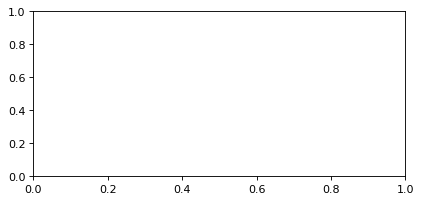

In [19]:
import numpy as np
import matplotlib.pyplot as plt

mnist = np.load('mnist.npz')
x_train = mnist['x_train'][:10000]/255.
y_train = np.array([np.eye(10)[n] for n in mnist['y_train'][:10000]])
x_test = mnist['x_test']/255.
y_test = np.array([np.eye(10)[n] for n in mnist['y_test']])

from skimage.transform import rotate
ext1 = np.array([rotate(img,np.random.uniform(+5.,+25.)) for img in x_train])
ext2 = np.array([rotate(img,np.random.uniform(-25.,-5.)) for img in x_train])
x_train_ext = np.vstack([x_train,ext1,ext2])
y_train_ext = np.vstack([y_train,y_train,y_train])

from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import Dense, Reshape
from tensorflow.keras.optimizers import SGD

m1 = Sequential()
m1.add(Reshape((784,), input_shape=(28,28)))
m1.add(Dense(30, activation='sigmoid'))
m1.add(Dense(10, activation='softmax'))
m1.compile(loss='categorical_crossentropy',
           optimizer=SGD(lr=1.0), metrics=['accuracy'])

m2 = clone_model(m1)
m2.compile(loss='categorical_crossentropy',
           optimizer=SGD(lr=1.0), metrics=['accuracy'])

rec1 = m1.fit(x_train, y_train, epochs=100, batch_size=120,
              validation_data=(x_test, y_test))
rec2 = m2.fit(x_train_ext, y_train_ext, epochs=100, batch_size=120,
              validation_data=(x_test, y_test))

vep = np.linspace(1.,100.,100)
fig = plt.figure(figsize=(6,6), dpi=80)
plt.subplot(2,1,1)
plt.plot(vep,rec1.history['accuracy'], lw=3)
plt.plot(vep,rec1.history['val_accuracy'], lw=3)
plt.ylim(0.85,1.01)
plt.grid()
plt.subplot(2,1,2)
plt.plot(vep,rec2.history['accuracy'], lw=3)
plt.plot(vep,rec2.history['val_accuracy'], lw=3)
plt.ylim(0.85,1.01)
plt.grid()
plt.show()


Epoch 1/100
10000/10000 [==============================] - 1s 103us/sample - loss: 1.3125
Epoch 2/100
10000/10000 [==============================] - 0s 32us/sample - loss: 0.6169
Epoch 3/100
10000/10000 [==============================] - 0s 34us/sample - loss: 0.45320s - loss: 0.456
Epoch 4/100
10000/10000 [==============================] - 0s 33us/sample - loss: 0.3827
Epoch 5/100
10000/10000 [==============================] - 0s 35us/sample - loss: 0.3412
Epoch 6/100
10000/10000 [==============================] - 0s 33us/sample - loss: 0.3128
Epoch 7/100
10000/10000 [==============================] - 0s 31us/sample - loss: 0.2925
Epoch 8/100
10000/10000 [==============================] - 0s 29us/sample - loss: 0.2753
Epoch 9/100
10000/10000 [==============================] - 0s 49us/sample - loss: 0.2612
Epoch 10/100
10000/10000 [==============================] - 0s 37us/sample - loss: 0.2494
Epoch 11/100
10000/10000 [==============================] - 0s 39us/sample - loss: 0.2382
Ep

10000/10000 [==============================] - 0s 24us/sample - loss: 0.0421
Epoch 92/100
10000/10000 [==============================] - 0s 24us/sample - loss: 0.0414
Epoch 93/100
10000/10000 [==============================] - 0s 24us/sample - loss: 0.0409
Epoch 94/100
10000/10000 [==============================] - 0s 24us/sample - loss: 0.0403
Epoch 95/100
10000/10000 [==============================] - 0s 24us/sample - loss: 0.0398
Epoch 96/100
10000/10000 [==============================] - 0s 24us/sample - loss: 0.0391
Epoch 97/100
10000/10000 [==============================] - 0s 24us/sample - loss: 0.0384
Epoch 98/100
10000/10000 [==============================] - 0s 24us/sample - loss: 0.0379
Epoch 99/100
10000/10000 [==============================] - 0s 24us/sample - loss: 0.0373
Epoch 100/100
10000/10000 [==============================] - 0s 24us/sample - loss: 0.0367
Epoch 1/100
10000/10000 [==============================] - 1s 76us/sample - loss: 0.6237
Epoch 2/100
10000/10000

10000/10000 [==============================] - 0s 30us/sample - loss: 0.0023
Epoch 83/100
10000/10000 [==============================] - 0s 31us/sample - loss: 0.0022
Epoch 84/100
10000/10000 [==============================] - 0s 30us/sample - loss: 0.0022
Epoch 85/100
10000/10000 [==============================] - 0s 31us/sample - loss: 0.0022
Epoch 86/100
10000/10000 [==============================] - 0s 29us/sample - loss: 0.0021
Epoch 87/100
10000/10000 [==============================] - 0s 34us/sample - loss: 0.0021
Epoch 88/100
10000/10000 [==============================] - 0s 30us/sample - loss: 0.0021
Epoch 89/100
10000/10000 [==============================] - 0s 29us/sample - loss: 0.0020
Epoch 90/100
10000/10000 [==============================] - 0s 27us/sample - loss: 0.00200s - loss: 0.0
Epoch 91/100
10000/10000 [==============================] - 0s 26us/sample - loss: 0.0020
Epoch 92/100
10000/10000 [==============================] - 0s 28us/sample - loss: 0.0019
Epoch 93/

10000/10000 [==============================] - 0s 37us/sample - loss: 1.0581
Epoch 73/100
10000/10000 [==============================] - 0s 35us/sample - loss: 1.0611
Epoch 74/100
10000/10000 [==============================] - 0s 41us/sample - loss: 1.0511
Epoch 75/100
10000/10000 [==============================] - 0s 28us/sample - loss: 0.9556
Epoch 76/100
10000/10000 [==============================] - 0s 28us/sample - loss: 0.8708
Epoch 77/100
10000/10000 [==============================] - 0s 29us/sample - loss: 0.8656
Epoch 78/100
10000/10000 [==============================] - 0s 26us/sample - loss: 0.8500
Epoch 79/100
10000/10000 [==============================] - 0s 27us/sample - loss: 0.8607
Epoch 80/100
10000/10000 [==============================] - 0s 29us/sample - loss: 0.8514
Epoch 81/100
10000/10000 [==============================] - 0s 28us/sample - loss: 0.8521
Epoch 82/100
10000/10000 [==============================] - 0s 29us/sample - loss: 0.8559
Epoch 83/100
10000/1000

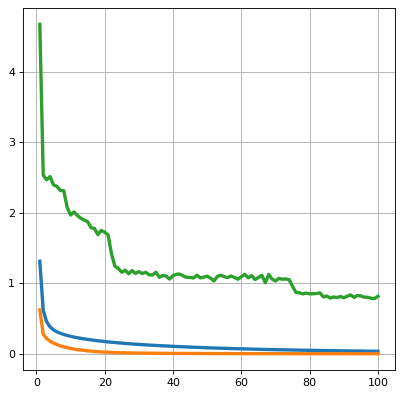

In [20]:
import numpy as np
import matplotlib.pyplot as plt

mnist = np.load('mnist.npz')
x_train = mnist['x_train'][:10000]/255.
y_train = np.array([np.eye(10)[n] for n in mnist['y_train'][:10000]])

from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import Dense, Reshape
from tensorflow.keras.optimizers import SGD

m1 = Sequential()
m1.add(Reshape((784,), input_shape=(28,28)))
m1.add(Dense(30, activation='sigmoid'))
m1.add(Dense(10, activation='softmax'))
m1.compile(loss='categorical_crossentropy',
           optimizer=SGD(lr=0.2))

m2 = clone_model(m1)
m2.compile(loss='categorical_crossentropy',
           optimizer=SGD(lr=2.0))

m3 = clone_model(m1)
m3.compile(loss='categorical_crossentropy',
           optimizer=SGD(lr=20.))

rec1 = m1.fit(x_train, y_train, epochs=100, batch_size=60)
rec2 = m2.fit(x_train, y_train, epochs=100, batch_size=60)
rec3 = m3.fit(x_train, y_train, epochs=100, batch_size=60)

vep = np.linspace(1.,100.,100)
fig = plt.figure(figsize=(6,6), dpi=80)
plt.plot(vep,rec1.history['loss'], lw=3)
plt.plot(vep,rec2.history['loss'], lw=3)
plt.plot(vep,rec3.history['loss'], lw=3)
plt.grid()
plt.show()


Epoch 1/100
10000/10000 [==============================] - 1s 99us/sample - loss: 0.6760
Epoch 2/100
10000/10000 [==============================] - 0s 30us/sample - loss: 0.3119
Epoch 3/100
10000/10000 [==============================] - 0s 32us/sample - loss: 0.2545
Epoch 4/100
10000/10000 [==============================] - 0s 30us/sample - loss: 0.2175
Epoch 5/100
10000/10000 [==============================] - 0s 29us/sample - loss: 0.1891
Epoch 6/100
10000/10000 [==============================] - 0s 36us/sample - loss: 0.1676
Epoch 7/100
10000/10000 [==============================] - 0s 34us/sample - loss: 0.1496
Epoch 8/100
10000/10000 [==============================] - 0s 36us/sample - loss: 0.1368
Epoch 9/100
10000/10000 [==============================] - 0s 33us/sample - loss: 0.1226
Epoch 10/100
10000/10000 [==============================] - 0s 33us/sample - loss: 0.1125
Epoch 11/100
10000/10000 [==============================] - 0s 33us/sample - loss: 0.1041
Epoch 12/100
10000/

10000/10000 [==============================] - 0s 25us/sample - loss: 0.0039
Epoch 92/100
10000/10000 [==============================] - 0s 28us/sample - loss: 0.0039
Epoch 93/100
10000/10000 [==============================] - 0s 28us/sample - loss: 0.0038
Epoch 94/100
10000/10000 [==============================] - 0s 28us/sample - loss: 0.0038
Epoch 95/100
10000/10000 [==============================] - 0s 28us/sample - loss: 0.0037
Epoch 96/100
10000/10000 [==============================] - 0s 28us/sample - loss: 0.0037
Epoch 97/100
10000/10000 [==============================] - 0s 25us/sample - loss: 0.0036
Epoch 98/100
10000/10000 [==============================] - 0s 25us/sample - loss: 0.0036
Epoch 99/100
10000/10000 [==============================] - 0s 28us/sample - loss: 0.00350s - loss: 0
Epoch 100/100
10000/10000 [==============================] - 0s 25us/sample - loss: 0.0035
Epoch 1/100
10000/10000 [==============================] - 1s 88us/sample - loss: 0.5746
Epoch 2/100

10000/10000 [==============================] - 0s 28us/sample - loss: 0.0024
Epoch 82/100
10000/10000 [==============================] - 0s 38us/sample - loss: 0.0024
Epoch 83/100
10000/10000 [==============================] - 0s 29us/sample - loss: 0.0024
Epoch 84/100
10000/10000 [==============================] - 0s 27us/sample - loss: 0.0023
Epoch 85/100
10000/10000 [==============================] - 0s 25us/sample - loss: 0.0023
Epoch 86/100
10000/10000 [==============================] - 0s 26us/sample - loss: 0.0023
Epoch 87/100
10000/10000 [==============================] - 0s 28us/sample - loss: 0.0022
Epoch 88/100
10000/10000 [==============================] - 0s 25us/sample - loss: 0.0022
Epoch 89/100
10000/10000 [==============================] - 0s 26us/sample - loss: 0.0021
Epoch 90/100
10000/10000 [==============================] - 0s 30us/sample - loss: 0.0021
Epoch 91/100
10000/10000 [==============================] - 0s 38us/sample - loss: 0.0021
Epoch 92/100
10000/1000

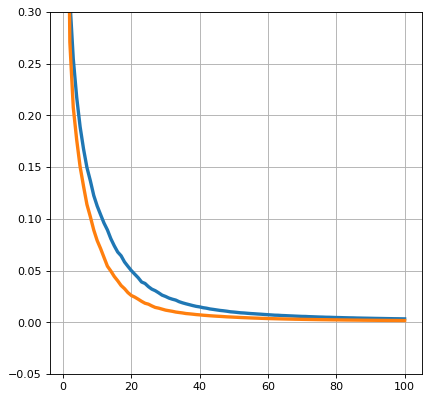

In [23]:
import numpy as np
import matplotlib.pyplot as plt

mnist = np.load('mnist.npz')
x_train = mnist['x_train'][:10000]/255.
y_train = np.array([np.eye(10)[n] for n in mnist['y_train'][:10000]])

from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import Dense, Reshape
from tensorflow.keras.optimizers import SGD

m1 = Sequential()
m1.add(Reshape((784,), input_shape=(28,28)))
m1.add(Dense(30, activation='sigmoid'))
m1.add(Dense(10, activation='softmax'))
m1.compile(loss='categorical_crossentropy',
           optimizer=SGD(lr=1.0))

m2 = clone_model(m1)
m2.compile(loss='categorical_crossentropy',
           optimizer=SGD(lr=1.0, momentum=0.4))

rec1 = m1.fit(x_train, y_train, epochs=100, batch_size=60)
rec2 = m2.fit(x_train, y_train, epochs=100, batch_size=60)

vep = np.linspace(1.,100.,100)
fig = plt.figure(figsize=(6,6), dpi=80)
plt.plot(vep,rec1.history['loss'], lw=3)
plt.plot(vep,rec2.history['loss'], lw=3)
plt.ylim(-0.05,0.3)
plt.grid()
plt.show()

Train on 10000 samples, validate on 10000 samples
Epoch 1/40
10000/10000 [==============================] - 1s 141us/sample - loss: 2.1372 - acc: 0.2720 - val_loss: 1.3121 - val_acc: 0.5553
Epoch 2/40
10000/10000 [==============================] - 1s 97us/sample - loss: 0.7438 - acc: 0.7532 - val_loss: 0.6092 - val_acc: 0.7985
Epoch 3/40
10000/10000 [==============================] - 1s 107us/sample - loss: 0.4237 - acc: 0.8696 - val_loss: 0.4255 - val_acc: 0.8706
Epoch 4/40
10000/10000 [==============================] - 1s 103us/sample - loss: 0.3244 - acc: 0.9015 - val_loss: 0.3433 - val_acc: 0.8962
Epoch 5/40
10000/10000 [==============================] - 1s 105us/sample - loss: 0.2780 - acc: 0.9186 - val_loss: 0.3735 - val_acc: 0.8840
Epoch 6/40
10000/10000 [==============================] - 1s 93us/sample - loss: 0.2458 - acc: 0.9231 - val_loss: 0.3017 - val_acc: 0.9080
Epoch 7/40
10000/10000 [==============================] - 1s 89us/sample - loss: 0.2158 - acc: 0.9339 - val_loss

Epoch 19/40
10000/10000 [==============================] - 1s 130us/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 0.1570 - val_acc: 0.9582
Epoch 20/40
10000/10000 [==============================] - 1s 105us/sample - loss: 0.0024 - acc: 1.0000 - val_loss: 0.1587 - val_acc: 0.9589
Epoch 21/40
10000/10000 [==============================] - 1s 87us/sample - loss: 0.0022 - acc: 1.0000 - val_loss: 0.1606 - val_acc: 0.9586
Epoch 22/40
10000/10000 [==============================] - 1s 92us/sample - loss: 0.0020 - acc: 1.0000 - val_loss: 0.1619 - val_acc: 0.9590
Epoch 23/40
10000/10000 [==============================] - 1s 125us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 0.1625 - val_acc: 0.9589
Epoch 24/40
10000/10000 [==============================] - 1s 107us/sample - loss: 0.0017 - acc: 1.0000 - val_loss: 0.1647 - val_acc: 0.9590
Epoch 25/40
10000/10000 [==============================] - 1s 87us/sample - loss: 0.0016 - acc: 1.0000 - val_loss: 0.1637 - val_acc: 0.9587
Epoch 26/40
1000

KeyError: 'accuracy'

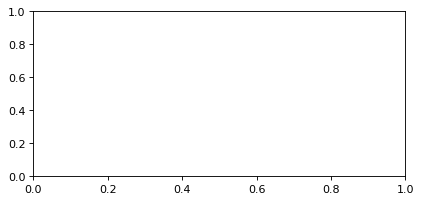

In [24]:
import numpy as np
import matplotlib.pyplot as plt

mnist = np.load('mnist.npz')
x_train = mnist['x_train'][:10000]/255.
y_train = np.array([np.eye(10)[n] for n in mnist['y_train'][:10000]])
x_test = mnist['x_test']/255.
y_test = np.array([np.eye(10)[n] for n in mnist['y_test']])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape
from tensorflow.keras.optimizers import SGD

m1 = Sequential()
m1.add(Reshape((784,), input_shape=(28,28)))
m1.add(Dense(256, activation='sigmoid'))
m1.add(Dense(256, activation='sigmoid'))
m1.add(Dense(10, activation='softmax'))
m1.compile(loss='categorical_crossentropy',
           optimizer=SGD(lr=1.0), metrics=['accuracy'])

m2 = Sequential()
m2.add(Reshape((784,), input_shape=(28,28)))
m2.add(Dense(256, activation='relu'))
m2.add(Dense(256, activation='relu'))
m2.add(Dense(10, activation='softmax'))
m2.compile(loss='categorical_crossentropy',
           optimizer=SGD(lr=0.2), metrics=['accuracy'])

rec1 = m1.fit(x_train, y_train, epochs=40, batch_size=60,
              validation_data=(x_test, y_test))
rec2 = m2.fit(x_train, y_train, epochs=40, batch_size=60,
              validation_data=(x_test, y_test))

vep = np.linspace(1.,40.,40)
fig = plt.figure(figsize=(6,6), dpi=80)
plt.subplot(2,1,1)
plt.plot(vep,rec1.history['accuracy'], lw=3)
plt.plot(vep,rec1.history['val_accuracy'], lw=3)
plt.ylim(0.85,1.01)
plt.grid()
plt.subplot(2,1,2)
plt.plot(vep,rec2.history['accuracy'], lw=3)
plt.plot(vep,rec2.history['val_accuracy'], lw=3)
plt.ylim(0.85,1.01)
plt.grid()
plt.show()

In [34]:
x_train=np.array([[[np.random.randn()for m in range(14)]for n in range(14)]for i in range(100)])
y_train=np.array([np.random.randn() for n in range(100)])
for n,m in enumerate(y_train):
    if m<0:
        y_train[n]=0
#     elif m>-0.2 and m<=0:
#         y_train[n]=1
#     elif m>0 and m<=0.2:
#         y_train[n]=2
    else:
        y_train[n]=1
W1=np.zeros((196,20), dtype=np.int)
W2=np.zeros((20,1), dtype=np.int)
# x_test=np.array([[[np.random.randn()for m in range(14)]for n in range(14)]for i in range(200)])

x_test=np.array([[[np.random.randn()for m in range(14)]for n in range(14)]for i in range(100)])
y_test=np.array([np.random.randn() for n in range(100)])
for n,m in enumerate(y_test):
    if m<0:
        y_test[n]=0
#     elif m>-0.2 and m<=0:
#         y_train[n]=1
#     elif m>0 and m<=0.2:
#         y_train[n]=2
    else:
        y_test[n]=1

In [35]:
y_test

array([1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.])

In [68]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2

def loss_vs_epoch(x_train, y_train, x_test, y_test, W1, W2):
    loss = np.zeros((2,60))
    ### START YOUR CODE HERE ###
    
    model = Sequential()
    model.add(Reshape((196,), input_shape=(14,14)))
    model.add(Dense(units=20, activation='sigmoid'))
    model.add(Dense(units=1, activation='sigmoid',kernel_regularizer=l2(0.1)))   
    
    model.compile(loss='binary_crossentropy', optimizer=SGD(lr=1.0))
    model.layers[1].set_weights([W1,np.zeros(20)])
    model.layers[2].set_weights([W2,np.zeros(1)])

    for i in range(60):
        rec=model.fit(x_train, y_train, epochs=1, batch_size=100)#,validation_data=(x_test, y_test))
        loss[0][i] = model.evaluate(x_train, y_train)
        loss[1][i] = model.evaluate(x_test, y_test)
    
#     training_loss=rec.history['loss']
#     testing_loss=rec.history['val_loss']
#     y_predict=model.predict(x_test)
    
#     loss[0]=training_loss
#     loss[1]=testing_loss
    #### END YOUR CODE HERE ####
    return loss


In [69]:
loss_vs_epoch(x_train, y_train, x_test, y_test, W1, W2)

100/100 [==============================] - 0s 30us/sample - loss: 0.6686


100/100 [==============================] - 0s 50us/sample - loss: 0.7700


array([[0.69060527, 0.68932193, 0.68869015, 0.68832957, 0.68810101,
        0.68793002, 0.68778486, 0.68764922, 0.68751498, 0.68737709,
        0.68723229, 0.68707786, 0.68691129, 0.68673019, 0.68653207,
        0.68631406, 0.68607331, 0.68580675, 0.68551095, 0.68518211,
        0.68481621, 0.68440866, 0.68395456, 0.68344845, 0.68288449,
        0.68225621, 0.68155641, 0.68077761, 0.67991131, 0.67894853,
        0.67787968, 0.67669438, 0.67538172, 0.67393006, 0.6723275 ,
        0.67056133, 0.66861902, 0.66648761, 0.66415449, 0.66160725,
        0.65883419, 0.65582479, 0.65256976, 0.64906157, 0.6452949 ,
        0.64126683, 0.63697745, 0.63242995, 0.62763061, 0.62258934,
        0.61731929, 0.61183694, 0.60616173, 0.60031554, 0.59432253,
        0.58820834, 0.58199958, 0.57572305, 0.56940554, 0.56307281],
       [0.70860526, 0.69563783, 0.70347963, 0.69788031, 0.70170673,
        0.6992882 , 0.70115821, 0.70016274, 0.70111642, 0.70076867,
        0.70130542, 0.70125797, 0.70161313, 0.7

In [298]:
C=np.array([1.8,3.4,1.5,0.6,3.5])
C_new=np.zeros(7)
for i in range(5):
    C_new[i+1]=C[i]
C=C_new
C_new=np.zeros(31)
C_new
C_index=copy.copy(C_new)
for i in range (6):
    for j in range(5):
        C_new[i*5+j]=C[i]+j*(C[i+1]-C[i])/5
        C_index[i*5+j]=0.2*j+i
C_new[-1]=0
C_index[-1]=6

In [299]:
C

array([0. , 1.8, 3.4, 1.5, 0.6, 3.5, 0. ])

In [300]:
C_new

array([0.  , 0.36, 0.72, 1.08, 1.44, 1.8 , 2.12, 2.44, 2.76, 3.08, 3.4 ,
       3.02, 2.64, 2.26, 1.88, 1.5 , 1.32, 1.14, 0.96, 0.78, 0.6 , 1.18,
       1.76, 2.34, 2.92, 3.5 , 2.8 , 2.1 , 1.4 , 0.7 , 0.  ])

In [301]:
C_index

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ,
       5.2, 5.4, 5.6, 5.8, 6. ])

In [169]:
model = Sequential()
### START YOUR CODE HERE ###


model.add(Dense(6, activation='relu', input_dim=1))
model.add(Dense(1, activation='relu'))

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=1.0))
model.fit(C_index, C_new, epochs=10, batch_size=5)#,validation_data=(x_test, y_test))

Epoch 1/10
60/60 [==============================] - 1s 18ms/sample - loss: -18.3828
Epoch 2/10
60/60 [==============================] - 0s 416us/sample - loss: -19.1665
Epoch 3/10
60/60 [==============================] - 0s 567us/sample - loss: -19.1665
Epoch 4/10
60/60 [==============================] - 0s 382us/sample - loss: -19.1665
Epoch 5/10
60/60 [==============================] - 0s 350us/sample - loss: -19.1665
Epoch 6/10
60/60 [==============================] - 0s 433us/sample - loss: -19.1665
Epoch 7/10
60/60 [==============================] - 0s 366us/sample - loss: -19.1665
Epoch 8/10
60/60 [==============================] - 0s 350us/sample - loss: -19.1665
Epoch 9/10
60/60 [==============================] - 0s 349us/sample - loss: -19.1665
Epoch 10/10
60/60 [==============================] - 0s 333us/sample - loss: -19.1665


In [189]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import copy

def polyline_model(C):
    model = Sequential()
    ### START YOUR CODE HERE ###

    C_new=np.zeros(7)
    for i in range(5):
        C_new[i+1]=C[i]
    C=C_new
    C_new=np.zeros(31)
    C_new
    C_index=copy.copy(C_new)
    for i in range (6):
        for j in range(5):
            C_new[i*5+j]=C[i]+j*(C[i+1]-C[i])/5
            C_index[i*5+j]=0.2*j+i
    C_new[-1]=0
    C_index[-1]=6
    
    
    
    model.add(Dense(6, activation='relu', input_dim=1))
    model.add(Dense(1, activation='relu'))
    
    model.compile(loss='mean_squared_error', optimizer=SGD(lr=1.0))
    model.fit(C_index, C_new, epochs=20, batch_size=60)#,validation_data=(x_test, y_test))

#     model.layers[1].set_weights([W1,np.zeros(20)])
#     model.layers[2].set_weights([W2,np.zeros(1)])
    
    #### END YOUR CODE HERE ####
    return model


In [190]:
polyline_model(C)

Epoch 1/20
60/60 [==============================] - 1s 17ms/sample - loss: 7.5452
Epoch 2/20
60/60 [==============================] - 0s 32us/sample - loss: 6.9105
Epoch 3/20
60/60 [==============================] - 0s 34us/sample - loss: 6.8739
Epoch 4/20
60/60 [==============================] - 0s 33us/sample - loss: 6.8561
Epoch 5/20
60/60 [==============================] - 0s 33us/sample - loss: 6.8454
Epoch 6/20
60/60 [==============================] - 0s 33us/sample - loss: 6.8382
Epoch 7/20
60/60 [==============================] - 0s 34us/sample - loss: 6.8330
Epoch 8/20
60/60 [==============================] - 0s 33us/sample - loss: 6.8292
Epoch 9/20
60/60 [==============================] - 0s 33us/sample - loss: 6.8261
Epoch 10/20
60/60 [==============================] - 0s 33us/sample - loss: 6.8237
Epoch 11/20
60/60 [==============================] - 0s 50us/sample - loss: 6.8217
Epoch 12/20
60/60 [==============================] - 0s 50us/sample - loss: 6.8200
Epoch 13/20
6

In [216]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import copy


model = Sequential()
C_new=np.zeros(7)
C_new[6]=6
for i in range(5):
    C_new[i+1]=C[i]
C=C_new
C_new=np.zeros(60)
C_new
C_index=copy.copy(C_new)
for i in range (6):
    for j in range(10):
        C_new[i*10+j]=C[i]+j*(C[i+1]-C[i])/10
        C_index[i*10+j]=0.1*j+i


model.add(Dense(6, activation='relu', input_dim=1))
model.add(Dense(1, activation='relu'))

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=1.0))
model.fit(C_index, C_new, epochs=100, batch_size=20)

Epoch 1/100
60/60 [==============================] - 1s 20ms/sample - loss: 7.2531
Epoch 2/100
60/60 [==============================] - 0s 99us/sample - loss: 6.9412
Epoch 3/100
60/60 [==============================] - 0s 117us/sample - loss: 6.9412
Epoch 4/100
60/60 [==============================] - 0s 133us/sample - loss: 6.9412
Epoch 5/100
60/60 [==============================] - 0s 133us/sample - loss: 6.9412
Epoch 6/100
60/60 [==============================] - 0s 133us/sample - loss: 6.9412
Epoch 7/100
60/60 [==============================] - 0s 133us/sample - loss: 6.9412
Epoch 8/100
60/60 [==============================] - 0s 134us/sample - loss: 6.9412
Epoch 9/100
60/60 [==============================] - 0s 117us/sample - loss: 6.9412
Epoch 10/100
60/60 [==============================] - 0s 133us/sample - loss: 6.9412
Epoch 11/100
60/60 [==============================] - 0s 134us/sample - loss: 6.9412
Epoch 12/100
60/60 [==============================] - 0s 116us/sample - loss

60/60 [==============================] - 0s 100us/sample - loss: 6.9412
Epoch 98/100
60/60 [==============================] - 0s 83us/sample - loss: 6.9412
Epoch 99/100
60/60 [==============================] - 0s 83us/sample - loss: 6.9412
Epoch 100/100
60/60 [==============================] - 0s 100us/sample - loss: 6.9412


In [214]:
p_test = model.predict(C_index)


# fig = plt.figure(figsize=(10,10), dpi=80)
# plt.axis('off')


# plt.imshow(p_test, cmap='Greys')
# plt.show()

In [215]:
p_test

array([[0.02184597],
       [0.02478904],
       [0.02820319],
       [0.03216067],
       [0.0367412 ],
       [0.04203168],
       [0.04812461],
       [0.05511647],
       [0.06310531],
       [0.07218698],
       [0.08245134],
       [0.09397718],
       [0.10682771],
       [0.12104532],
       [0.13664687],
       [0.15362027],
       [0.17192218],
       [0.19147709],
       [0.21217844],
       [0.23389205],
       [0.25645977],
       [0.279706  ],
       [0.30344415],
       [0.32748276],
       [0.35163328],
       [0.37571463],
       [0.39955914],
       [0.42301556],
       [0.44595188],
       [0.46825647],
       [0.48983833],
       [0.5106266 ],
       [0.5305693 ],
       [0.5496317 ],
       [0.56779426],
       [0.58505034],
       [0.60140485],
       [0.6168715 ],
       [0.63147116],
       [0.64523077],
       [0.658181  ],
       [0.6703557 ],
       [0.68179065],
       [0.6925226 ],
       [0.70258856],
       [0.71202534],
       [0.7208692 ],
       [0.729

In [340]:
C=np.array([1.8,3.4,1.5,0.6,3.5])

In [355]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def polyline_model(C):
    model = Sequential()
    ### START YOUR CODE HERE ###
    
    model.add(Dense(6, activation='relu', input_dim=1))
    model.add(Dense(1, activation='relu'))
    W=np.array([[0.],[0.],[0.],[0.],[0.],[0.]])

    C_new=np.zeros(7)
    C_new[6]=0
    for i in range(5):
        C_new[i+1]=C[i]
    C=C_new
    
    for i in range(6):
        W[i][0]=C[i+1]-C[i]-(C[i]-C[i-1])

    
    model.layers[0].set_weights([np.array([[1,1,1,1,1,1]]),np.array([0,-1,-2,-3,-4,-5])])
    model.layers[1].set_weights([W,np.array([0])])

    #### END YOUR CODE HERE ####
    return model,W


In [356]:
polyline_model(C)

(<tensorflow.python.keras.engine.sequential.Sequential at 0x1f2278f6a58>,
 array([[ 1.8],
        [-0.2],
        [-3.5],
        [ 1. ],
        [ 3.8],
        [-6.4]]))

In [ ]:
#HW1

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Dense
from tensorflow.keras.optimizers import SGD

def loss_vs_epoch(x_train, y_train, x_test, y_test, W1, W2):
    loss = np.zeros((2,60))
    ### START YOUR CODE HERE ###
    
    model = Sequential()
    model.add(Reshape((196,), input_shape=(14,14)))
    model.add(Dense(units=20, activation='sigmoid'))
    model.add(Dense(units=1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer=SGD(lr=1.0))
    model.layers[1].set_weights([W1,np.zeros(20)])
    model.layers[2].set_weights([W2,np.zeros(1)])

    for i in range(60):
        rec=model.fit(x_train, y_train, epochs=1, batch_size=100)
        loss[0][i] = model.evaluate(x_train, y_train)
        loss[1][i] = model.evaluate(x_test, y_test)
    
    #### END YOUR CODE HERE ####
    return loss


In [ ]:
#HW2

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2

def loss_vs_epoch(x_train, y_train, x_test, y_test, W1, W2):
    loss = np.zeros((2,60))
    ### START YOUR CODE HERE ###
    
    model = Sequential()
    model.add(Reshape((196,), input_shape=(14,14)))
    model.add(Dense(units=20, activation='sigmoid'))
    model.add(Dense(units=1, activation='sigmoid',kernel_regularizer=l2(0.1)))   
    
    model.compile(loss='binary_crossentropy', optimizer=SGD(lr=1.0))
    model.layers[1].set_weights([W1,np.zeros(20)])
    model.layers[2].set_weights([W2,np.zeros(1)])

    for i in range(60):
        rec=model.fit(x_train, y_train, epochs=1, batch_size=100)
        loss[0][i] = model.evaluate(x_train, y_train)
        loss[1][i] = model.evaluate(x_test, y_test)

    #### END YOUR CODE HERE ####
    return loss


In [ ]:
#HW3

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def polyline_model(C):
    model = Sequential()
    ### START YOUR CODE HERE ###
    
    model.add(Dense(6, activation='relu', input_dim=1))
    model.add(Dense(1, activation='relu'))
    W=np.array([[0.],[0.],[0.],[0.],[0.],[0.]])

    C_new=np.zeros(7)
    C_new[6]=0
    for i in range(5):
        C_new[i+1]=C[i]
    C=C_new
    
    for i in range(6):
        W[i][0]=C[i+1]-C[i]-(C[i]-C[i-1])

    
    model.layers[0].set_weights([np.array([[1,1,1,1,1,1]]),np.array([0,-1,-2,-3,-4,-5])])
    model.layers[1].set_weights([W,np.array([0])])

    #### END YOUR CODE HERE ####
    return model
